# Fallstudie: Erweiterung des Süßwarensortiments (Eigenmarke)

In dieser Fallstudie geht es um die Erforschung der Charakteristika von Süßigkeiten, um davon ausgehend eine neue, möglichst gute Süßigkeit zu erstellen. Die zugrundeliegenden Daten sind dabei von einem [GitHub Repository](https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking).

Der Datensatz beinhaltet 85 verschiedene Süßigkeiten, die dazugehörgigen Katrgorien, die Zucker und Preis Spanne und die Winperecent. Die Daten sind zwar nicht wissenschaftlich erhoben worden, basieren aber auf einer Umfrage mit 290.000 Meinungen, die uns einen Einblick in die Präferenzen von Süßigkeiten geben können.


Wir beginnen damit, die Bibliotheken und die Daten in das Notebook zu laden, die Daten zu untersuchen und einige grundlegende Einblicke in die deskriptiven Statistiken zu erhalten. Als Nächstes visualisieren wir einige der Daten, um ein intuitiveres Verständnis für die Daten zu bekommen, bevor wir versuchen, das beste Süßigkeitenrezept zu finden.

In [1]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
# read csv into variable dataset
dataset = pd.read_csv('PATH TO CSV')
print(f"Mein Datanset besteht aus {dataset.shape[0]} Datensätzen mit jeweils {dataset.shape[1]} Attributen.")

Mein Datanset besteht aus 85 Datensätzen mit jeweils 13 Attributen.


In [3]:
# check whether read in of data worked
dataset.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
# get info about the properties of the attributes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


Aus der Info wird ersichtlich, dass keine Werte fehlen.

In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
chocolate,85.0,0.435294,0.498738,0.000000,0.000000,0.000000,1.000000,1.00000
fruity,85.0,0.447059,0.500140,0.000000,0.000000,0.000000,1.000000,1.00000
caramel,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
peanutyalmondy,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
nougat,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
crispedricewafer,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
hard,85.0,0.176471,0.383482,0.000000,0.000000,0.000000,0.000000,1.00000
bar,85.0,0.247059,0.433861,0.000000,0.000000,0.000000,0.000000,1.00000
pluribus,85.0,0.517647,0.502654,0.000000,0.000000,1.000000,1.000000,1.00000
sugarpercent,85.0,0.478647,0.282778,0.011000,0.220000,0.465000,0.732000,0.98800


Wie zu erwarten, haben die Kategorien (bis aus sugarpercent, pricepercent und winpercent) einen Minimalwert von 0 
und ein Maximum von 1. 
Anhand des Durchschnitts (Mean) können wir feststellen, dass die Kategorien caramel, peanutyalmondy, nougat, 
crispedricewafer, hard und bar unterrepräsentiert sind (das ist auch im unten stehenden Diagramm ersichtlich). Dies lässt 2 mögliche Schlüsse zu: Entweder der Datensatz ist unausgewogen und es fehlen Süßigkeiten, dann müssen weitere Untersuchungen zu dem Thema angestellt werden oder der Datensatz ist repräsentativ und diese Attribute sind im Bereich Süßigkeiten schlichtweg unterrepräsentiert, da sie beispielsweise nicht so beliebt sind.

Text(0.5, 1.0, 'Verteilung Attribute')

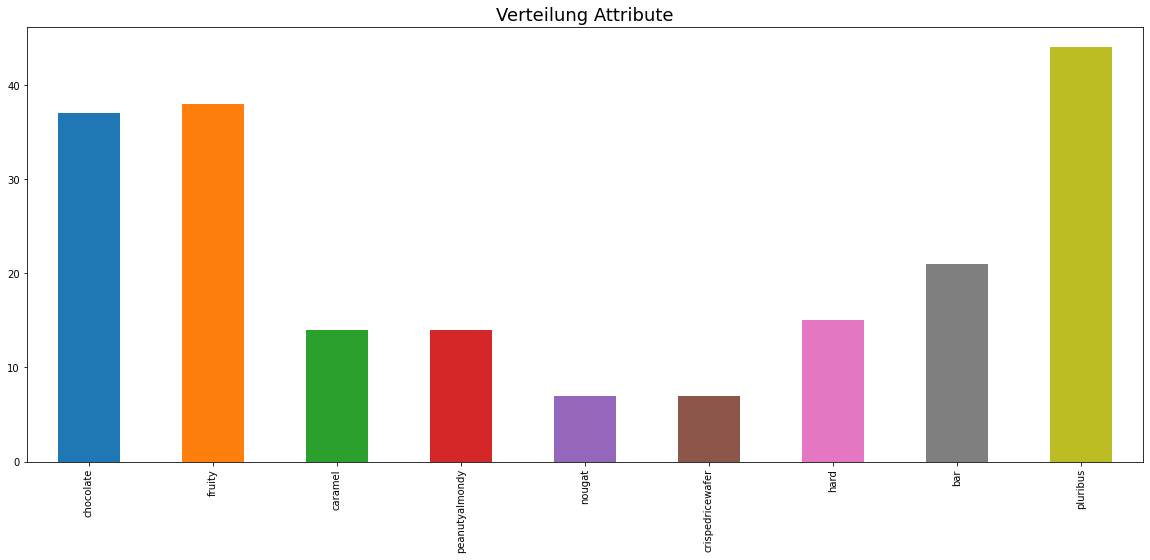

In [20]:
frequency = dataset.loc[:,'chocolate':'pluribus']
frequency = frequency.sum(axis=0)
frequency
frequency.plot.bar(color=["C0", "C1", "C2","C3","C4", "C5", "C6", "C7", "C8"], figsize=(20,8))
plt.title("Verteilung Attribute", fontsize=18)

In [7]:
# define the relavant attributes for the model
X = dataset[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent']]

In [8]:
# define the target
y = dataset['winpercent']

In [9]:
# create the model and use it on the dataset
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [10]:
# get the coefficients
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
chocolate,19.748067
fruity,9.422322
caramel,2.224481
peanutyalmondy,10.070688
nougat,0.804331
crispedricewafer,8.918970
hard,-6.165327
bar,0.441540
pluribus,-0.854500
sugarpercent,9.086763


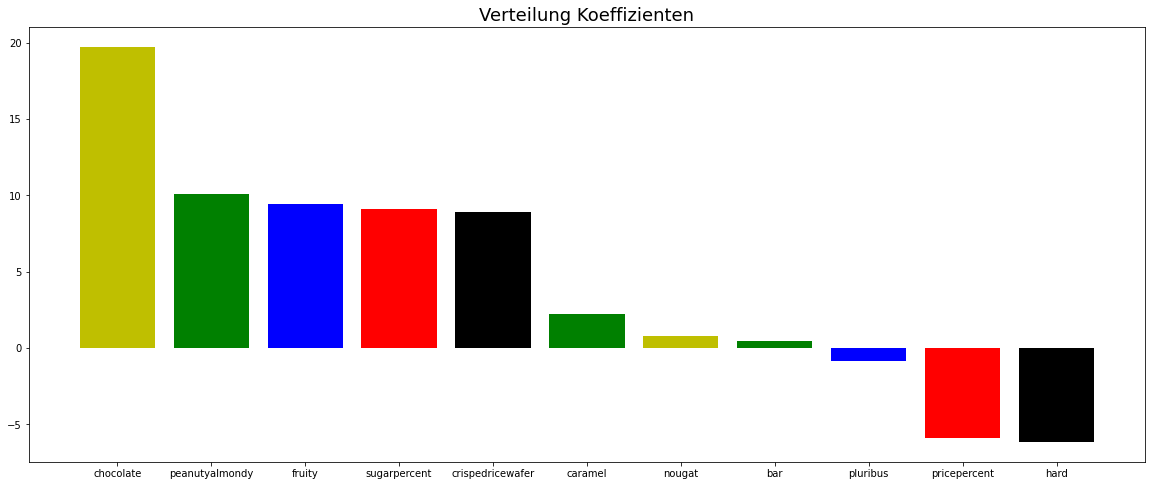

In [21]:
# combine the coeffs and the features in a data frame
coeffs_dataset = pd.DataFrame(coeff_df, X.columns).reset_index()

# rename the columns appropriately
coeffs_dataset.columns = ['candy_type', 'weight']

# sort the result in descending order and save in place
coeffs_dataset.sort_values('weight', ascending=False, inplace=True)

plt.figure(figsize=(20, 8))
plt.bar(x=coeffs_dataset['candy_type'], height=coeffs_dataset['weight'], color=['y', 'g', 'b', 'r', 'k', 'g'])
plt.title('Verteilung Koeffizienten', fontsize=18);


Durch die Koeffizienten wissen wir, dass Schokolade der Faktor ist, welcher den größten Einfluss auf die Winpercent hat. Dementsprechend sollte unsere Süßigkeit auf jeden Fall aus Schokolade bestehen.
Ausschließen können wir die Eigenschaften hard und pluribus. Zudem wissen wir aufgrund des starken Einflusses von pricepercent, dass wir, um eine hohe winpercentage zu erreichen, eine möglichst niedrige pricepercentage erziehlen müssen.
Ob die Sugarpercent in diesem Model überhaupt berücksichtigt werden sollte, ist fragwürdig, da sie mit Sicherheit abhängig von den anderen Attributen ist, daher wird sie in der weiteren Interpretation nicht berücksichtigt.
Die Schokolade könnte dabei mit Fruity, peanutyalmondy und/oder crispedricewafer gemischt werden, alle haben einen etwa gleichwertigen Einfluss auf die Winpercent.

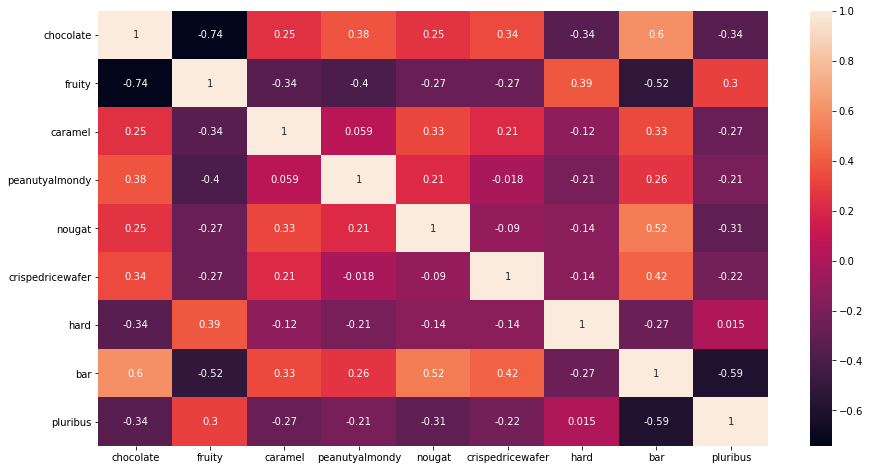

In [12]:
# draw correlation chart
corr = dataset.loc[:,'chocolate':'pluribus'].corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True);

Aus diesem Schaubild können wir entnehmen, dass Schokolade besonders oft in Kombination mit caramel, peanutyalmondy, nougat und/oder crispedricewafer vorkommt. Aber nur sehr selten mit fruity. Woran dies liegt bzw. ob es trotzdem Sinn macht Scholoade mit Früchten zu mischen, kann nicht abschließend geklärt werden und sollte z.B. durch die Marktforschung untersucht werden. Vorerst wird die Kombination jedoch ausgeschlossen.
Ebenso ist fraglich, wie viele Geschmacksrichtungen tatsächlich kombiniert werden könnten. Basierend auf der linearen Regression würden alle Attribute außer hard und pluribus eine Süßigkeit auf dem Papier verbessern. Jedoch würde sich die Süßigkeit bei der Mischung von zu vielen Geschmacksrichtungen vermutlich wieder verschlechtern.
Die größte Korrelation hat Schokolade laut dem Schaubild allerdings mit bar. Da bar auch einen positiven Effekt auf die winpercent hat, sollte das neue Produkt auf jeden Fall aus Schokolade in Form eines Riegels entworfen werden.
Wie anfangs erwähnt, ist die Kombination mit caramel, peanutyalmondy, nougat und/oder crispedricewafer basierend auf der Datengrundlage nur schwer einzuschätzen, da diese vergleichsweise wenig vorkommen. Um jedoch eine Empfehlung treffen zu können, würde ich mich an den beliebtesten 10 Produkten orientieren.




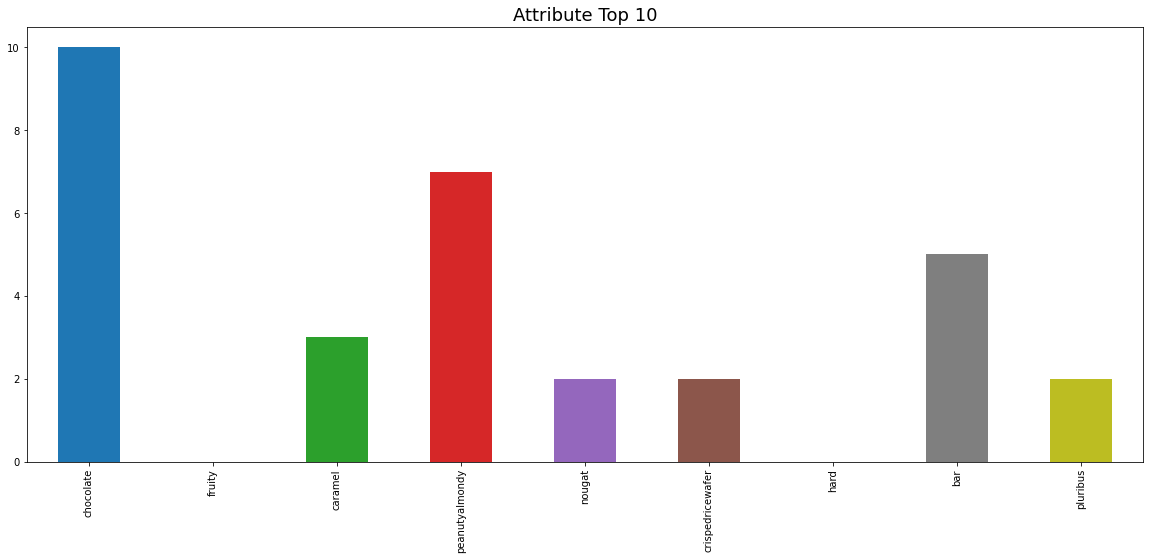

In [13]:
top_10 = dataset.sort_values('winpercent', ascending=False)[0:10]
top_10 = top_10.loc[:, 'chocolate':'pluribus']

top_10.sum().plot.bar(color=["C0", "C1", "C2","C3","C4", "C5", "C6", "C7", "C8"], figsize=(20,8));
plt.title('Attribute Top 10', fontsize=18);


Von den Top 10 Produkten sind 10 / 10 aus Schokolade und 5 / 10 in Form eines Riegels (bar), dies untermauert die These, dass das neue Produkt aus Schokolade in Form eines Riegels sein sollte. 
7 / 10 Produkten sind außerdem peanutyalmondy, weshalb eine Kombination aus chocolate und peanutyalmondy sinnvoll erscheint. Da sich gemäß den Daten die Kombination mehrerer Eigenschaften positiv auf das Produkt auswirkt und durch durch den Artikel "Snickers" bekannt ist, dass die zusätzliche Kombination mit Karamel und Nougat beliebt ist, kann das  Produkt um diese Eigenschaften erweitert werden.
Wenn von den Top 10 Produkten ausgegangen wird und von diesen auf das neue Produkt geschlossen wird, sollte jedoch darauf geachtet werden, dass der Markt nicht bereits mit solchen Produkten übersättigt ist bzw. möglicherweise mit einer guten Preisstrategie versuchen den Markt für uns zu erschließen.


Da dies jedoch gesondert zu prüfen ist, würde ich basierend auf den Daten folgendes Produkt vorschlagen:
- Ein Schokoladenriegel,
- gefüllt mit Erdnüssen und Mandeln,
- die von einer Mischung aus Karamell und Nougat umgeben sind
- einen hohen sugarpercent hat
- und mit einem möglichst niedrigen Pricepercent hergestellt wurden

In [14]:
average_sugarpercent = dataset.sugarpercent.mean()
average_sugarpercent

average_pricepercent = dataset.pricepercent.mean()
average_pricepercent

0.4688823524941178

In [15]:
new_candy = pd.DataFrame([1,0,1,1,1,0,0,1,0, average_sugarpercent, average_pricepercent]).T
display(new_candy)
prediction = regressor.predict(new_candy)
print(f'Die neu erstelle Süßigkeit hat eine winpercentage von etwa {round(prediction[0],2)}%.')

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.478647,0.468882


Die neu erstelle Süßigkeit hat eine winpercentage von etwa 69.39%.


In [16]:
max_sugarpercent = dataset.sugarpercent.max()
max_sugarpercent

max_pricepercent = dataset.pricepercent.min()
max_pricepercent

0.011000000000000001

Selbst mit einem durchschnittlichen Sugarpercent und einer durchschnittlichen Pricepercent wäre das Produkt bereits in den Top 15. 

In [17]:
new_candy = pd.DataFrame([1,0,1,1,1,0,0,1,0, max_sugarpercent, max_pricepercent]).T
display(new_candy)
prediction = regressor.predict(new_candy)
print(f'Die neu erstelle Süßigkeit hat eine winpercentage von etwa {round(prediction[0],2)}%.')

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.988,0.011


Die neu erstelle Süßigkeit hat eine winpercentage von etwa 76.74%.


Wenn wir diese beiden weiter optimieren, beide wurden auf das Optimum, der im Datensatz vorkommenden Werte gesetzt, dann wäre die neue Süßigkeit bereits am Stelle 6 der beliebtesten Süßigkeiten. Folglich hat unsere neue Süßigkeit ein großes Potential eine der beliebtesten Süßigkeiten zu werden.
Abschließend muss aber noch darauf hingewiesen werden, dass natürlich auch Faktoren, wie die Qualität der Zutaten oder Marketing/Werbung Einfluss auf die Beliebtheit des Produkts haben. Dies wird im Datensatz nicht berücksichtigt, weshalb es auch in der Entscheidungsfindung nicht berücksichtigt werden konnte.